In [1]:
from kedro.framework.session import KedroSession
from kedro.framework.startup import bootstrap_project
from pathlib import Path

# Point to project root
project_path = Path.cwd()

bootstrap_project(project_path)

session = KedroSession.create(
    project_path=project_path,
    env="base"
)

context = session.load_context()
catalog = context.catalog


[01/08/26 14:21:29] INFO     Using 'c:\Users\ShriyansJain\OneDrive - Chryselys Services Private     __init__.py:270
                             Limited\Documents\MMx                                                                 
                             tool\Code_base\MMx_Tool\Marketing_mix_tool\.venv\Lib\site-packages\ked                
                             ro\framework\project\rich_logging.yml' as logging configuration.                      

[01/08/26 14:21:54] INFO     Kedro is sending anonymous usage data with the sole purpose of improving plugin.py:242
                             the product. No personal data or IP addresses are stored on our side. To              
                             opt out, set the `KEDRO_DISABLE_TELEMETRY` or `DO_NOT_TRACK` environment              
                             variables, or create a `.telemetry` file in the current working                       
                             directory with the contents `consent: false`. To hide this message,                   
                             explicitly grant or deny consent. Read more at                                        
                             https://docs.kedro.org/en/stable/about/telemetry/                                     

In [2]:
model_results = catalog.load("model_results")
model_results

[01/08/26 14:21:57] INFO     Loading data from model_results (CSVDataset)...                   data_catalog.py:1046

,feature,coefficient,ci_lower,ci_upper
0,Intercept,1.250353,1.206869,1.293836
1,calls_sat,0.483585,0.425602,0.541567
2,media_spend_sat,0.596204,0.566115,0.626293
3,impressions_sat,0.189315,0.169022,0.209607
4,email_open_sat,0.277094,0.180867,0.373321
5,Group Var,0.318760,0.299722,0.337799


In [3]:
model_metrics = catalog.load("model_metrics")
model_metrics

[01/08/26 14:22:15] INFO     Loading data from model_metrics (CSVDataset)...                   data_catalog.py:1046

,metric,value
0,RMSE,1.667457
1,R2,-0.048678


In [4]:
validation_preds = catalog.load("validation_predictions")
validation_preds.head()


[01/08/26 14:22:21] INFO     Loading data from validation_predictions (CSVDataset)...          data_catalog.py:1046

,NPI,month,sales,Units,calls,media_spend,digital_rx_impressions,REACH,LINK_CLICKS,impressions,...,email_click,calls_adstock,calls_sat,media_spend_adstock,media_spend_sat,impressions_adstock,impressions_sat,email_open_adstock,email_open_sat,predicted_sales
0,1003031212,2025-01-06,1.0,30,0,0,0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.250353
1,1003043704,2025-01-02,0.5,15,0,0,0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.250353
2,1003043704,2025-01-03,1.0,15,0,0,0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.250353
3,1003043704,2025-01-04,3.0,45,0,0,0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.250353
4,1003043704,2025-01-05,1.0,30,0,0,0,0.0,0,0.0,...,0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.250353


In [5]:
channel_contrib = catalog.load("channel_contribution")
channel_contrib.head()


[01/08/26 14:22:29] INFO     Loading data from channel_contribution (CSVDataset)...            data_catalog.py:1046

,month,NPI,calls_contribution,media_spend_contribution,impressions_contribution,email_open_contribution,total_contribution
0,2025-01-06,1003031212,0.0,0.0,0.0,0.0,0.0
1,2025-01-02,1003043704,0.0,0.0,0.0,0.0,0.0
2,2025-01-03,1003043704,0.0,0.0,0.0,0.0,0.0
3,2025-01-04,1003043704,0.0,0.0,0.0,0.0,0.0
4,2025-01-05,1003043704,0.0,0.0,0.0,0.0,0.0


In [6]:
lme_model = catalog.load("lme_model")
print(lme_model.summary())


[01/08/26 14:22:37] INFO     Loading data from lme_model (PickleDataset)...                    data_catalog.py:1046

          Mixed Linear Model Regression Results
Model:            MixedLM Dependent Variable: sales      
No. Observations: 28298   Method:             REML       
No. Groups:       4621    Scale:              3.0362     
Min. group size:  1       Log-Likelihood:     -58093.9003
Max. group size:  20      Converged:          Yes        
Mean group size:  6.1                                    
---------------------------------------------------------
                Coef. Std.Err.   z    P>|z| [0.025 0.975]
---------------------------------------------------------
Intercept       1.250    0.022 56.358 0.000  1.207  1.294
calls_sat       0.484    0.030 16.346 0.000  0.426  0.542
media_spend_sat 0.596    0.015 38.836 0.000  0.566  0.626
impressions_sat 0.189    0.010 18.285 0.000  0.169  0.210
email_open_sat  0.277    0.049  5.644 0.000  0.181  0.373
Group Var       0.968    0.017                           



In [ ]:
# !pip install matplotlib

  Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-win_amd64.whl.metadata (6.4 kB)
   ---------------------------------------- 0.0/8.1 MB ? eta -:--:--
   --------- ------------------------------ 1.8/8.1 MB 9.1 MB/s eta 0:00:01
   -------------- ------------------------- 2.9/8.1 MB 8.0 MB/s eta 0:00:01
   --------------------- ------------------ 4.5/8.1 MB 7.3 MB/s eta 0:00:01
   ---------------------------- ----------- 5.8/8.1 MB 7.0 MB/s eta 0:00:01
   ------------------------------------- -- 7.6/8.1 MB 7.5 MB/s eta 0:00:01
   ---------------------------------------- 8.1/8.1 MB 7.5 MB/s eta 0:00:00
Using cached contourpy-1.3.3-cp312-cp312-win_amd64.whl (226 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
   ---------------------------------------- 0.0/2.3 MB ? eta -:--:--
   --------------------------- ------------ 1.6/2.3 MB 9.3 MB/s eta 0:00:0


[notice] A new release of pip is available: 24.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


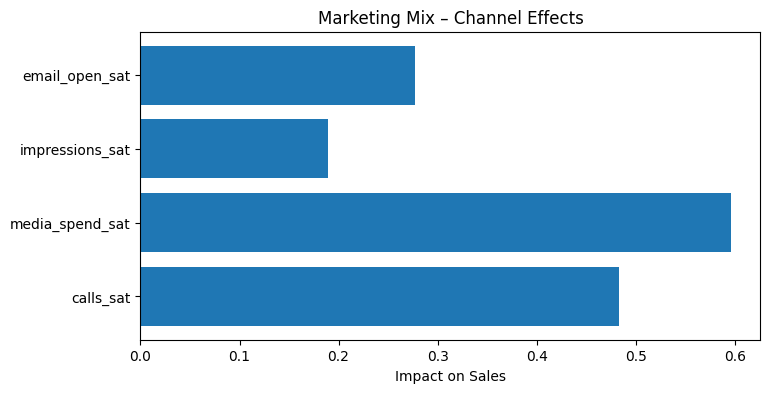

In [9]:
import matplotlib.pyplot as plt

df = model_results[model_results["feature"].str.contains("_sat")]

plt.figure(figsize=(8,4))
plt.barh(df["feature"], df["coefficient"])
plt.title("Marketing Mix – Channel Effects")
plt.xlabel("Impact on Sales")
plt.show()


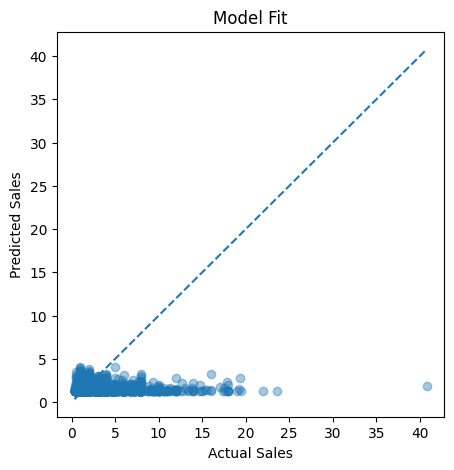

In [10]:
plt.figure(figsize=(5,5))
plt.scatter(
    validation_preds["sales"],
    validation_preds["predicted_sales"],
    alpha=0.4
)

min_val = min(validation_preds["sales"].min(), validation_preds["predicted_sales"].min())
max_val = max(validation_preds["sales"].max(), validation_preds["predicted_sales"].max())

plt.plot([min_val, max_val], [min_val, max_val], linestyle="--")
plt.xlabel("Actual Sales")
plt.ylabel("Predicted Sales")
plt.title("Model Fit")
plt.show()


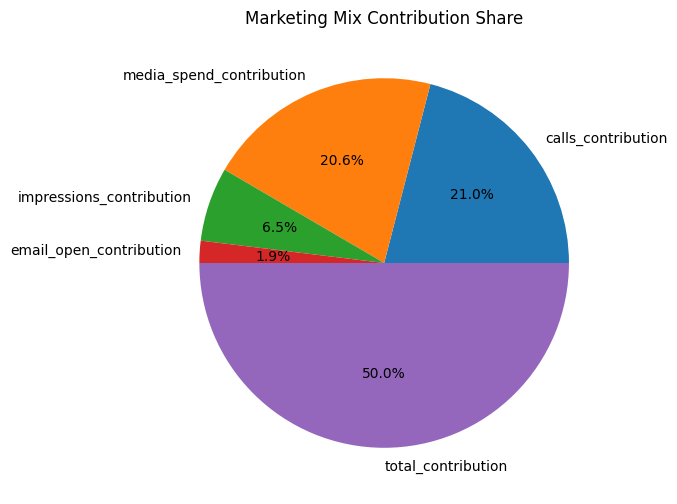

In [11]:
avg_contrib = channel_contrib.filter(like="_contribution").mean()

avg_contrib.plot(
    kind="pie",
    autopct="%1.1f%%",
    figsize=(6,6),
    title="Marketing Mix Contribution Share"
)

plt.ylabel("")
plt.show()
